<a href="https://colab.research.google.com/github/awnginga/Engage-Project/blob/main/Engage_Practical3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
df= pd.read_csv('/content/bmi_train.csv')
df


,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2
...,...,...,...,...
395,Male,166,160,5
396,Male,145,130,5
397,Male,178,138,5
398,Male,168,158,5


In [83]:
include=['object','float','int']
perc=[.20,.40,.60,.80]
df.describe(percentiles=perc, include=include)

,Gender,Height,Weight,Index
count,400,400.000000,400.000000,400.000000
unique,2,NaN,NaN,NaN
top,Male,NaN,NaN,NaN
freq,200,NaN,NaN,NaN
mean,NaN,170.362500,106.060000,3.737500
std,NaN,16.574011,32.362242,1.370507
min,NaN,140.000000,50.000000,0.000000
20%,NaN,153.000000,73.000000,2.000000
40%,NaN,166.000000,95.600000,4.000000
50%,NaN,171.000000,106.500000,4.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [85]:
df.describe()


,Height,Weight,Index
count,400.000000,400.000000,400.000000
mean,170.362500,106.060000,3.737500
std,16.574011,32.362242,1.370507
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,171.000000,106.500000,4.000000
75%,184.000000,136.250000,5.000000
max,199.000000,160.000000,5.000000


In [86]:
df.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [87]:
df['Weight'].describe()

,Weight
count,400.000000
mean,106.060000
std,32.362242
min,50.000000
25%,80.000000
50%,106.500000
75%,136.250000
max,160.000000


In [88]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values or fill them
df = df.dropna()  # or df.fillna(value)


Gender    0
Height    0
Weight    0
Index     0
dtype: int64


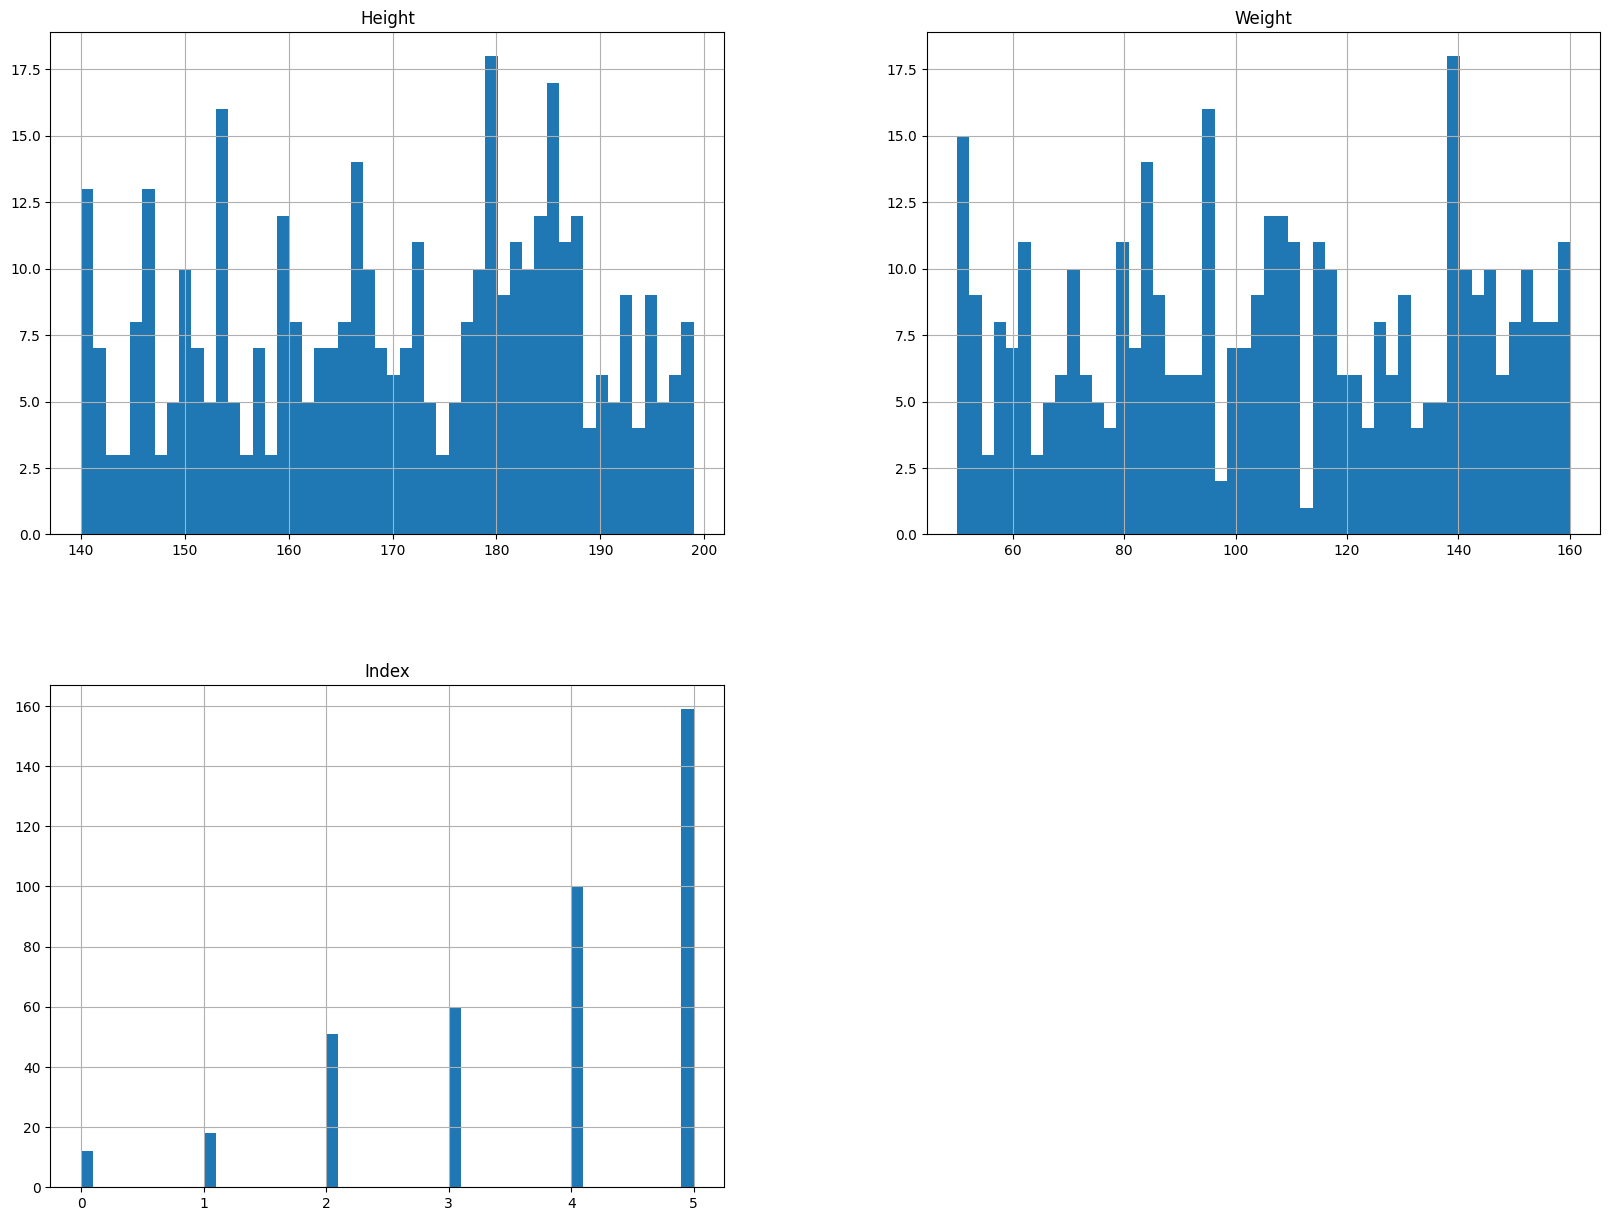

In [89]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()


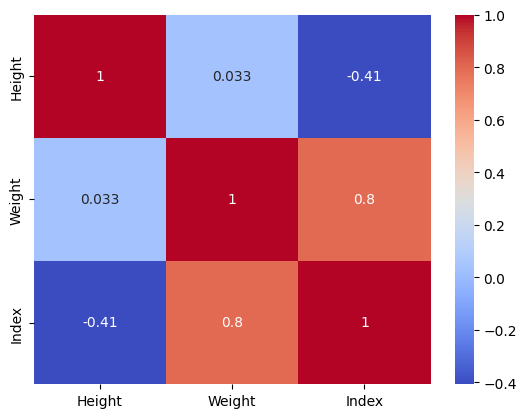

In [90]:
import seaborn as sns

corr_matrix = df.select_dtypes(include=['number']).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [91]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'Height': [161 179 172 153 165 182 142 158 194 178 155 151 181 147 146 157 173 170
 190 168 188 162 185 192 152 169 140 141 191 197 163 189 186 195 148 150
 184 154 144 177 167 145 193 187 183 149 171 180 176 159 166 143 196 198
 156 160 164 174 199 175]
Unique values in column 'Weight': [ 89 127 139 104  68  92 108 130  71 153 107  57  64  80 126 159 155  56
  82 102 118 140  78 123 115  52  90 142 103  54 105  67 129  86  96 119
 131 141  76 110 143  70  95  77 152 157 112 111  50 106 160 150  63 117
  79  58  94  85  59  84  53 144 121  66 125  60 114 151 120 100  55 156
 147 137  83  74 124  88 133  61  87 145  81 109 146  69 149 138  73  98
 128  91 135  97 136 101 154  62 158 132  99  65 122  93  75  51 116  72
 148 134]
Unique values in column 'Index': [4 5 2 3 1 0]


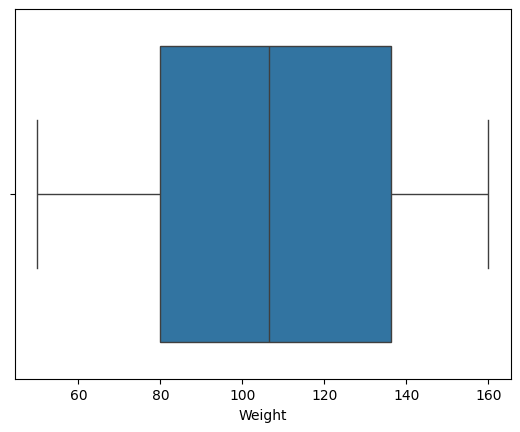

In [92]:
# Boxplot for detecting outliers
sns.boxplot(x=df['Weight'])
plt.show()


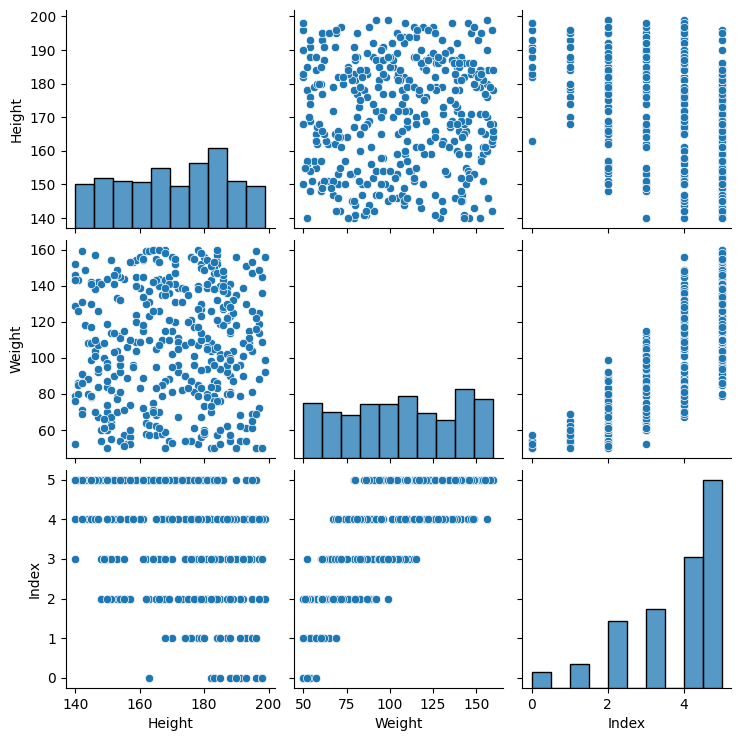

In [93]:
sns.pairplot(df)
plt.show()


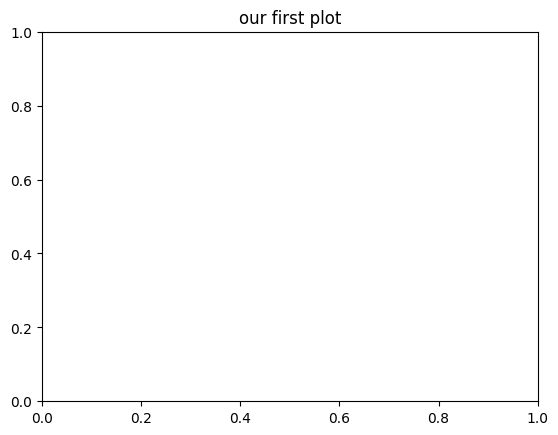

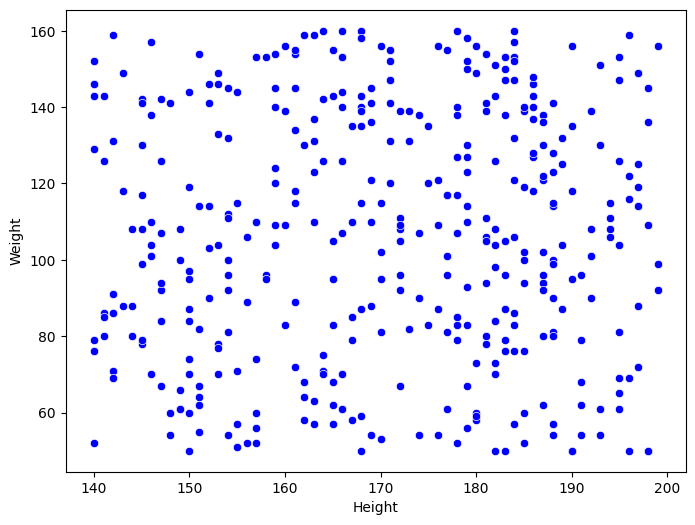

In [101]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module and give it the alias 'plt'
import seaborn as sns # Import the seaborn module and give it the alias 'sns'

plt.title('our first plot')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', data=df, color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [95]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=StandardScaler()
df['standardscaled_weight']=scaler.fit_transform(df[['Weight']])
df.head()

,Gender,Height,Weight,Index,standardscaled_weight
0,Male,161,89,4,-0.527818
1,Male,179,127,4,0.647861
2,Male,172,139,5,1.019128
3,Male,153,104,5,-0.063734
4,Male,165,68,2,-1.177535


In [96]:
minimaxscaler=MinMaxScaler()
df['min_max_scaled_weight']=minimaxscaler.fit_transform(df[['Weight']])
df

,Gender,Height,Weight,Index,standardscaled_weight,min_max_scaled_weight
0,Male,161,89,4,-0.527818,0.354545
1,Male,179,127,4,0.647861,0.700000
2,Male,172,139,5,1.019128,0.809091
3,Male,153,104,5,-0.063734,0.490909
4,Male,165,68,2,-1.177535,0.163636
...,...,...,...,...,...,...
395,Male,166,160,5,1.668845,1.000000
396,Male,145,130,5,0.740677,0.727273
397,Male,178,138,5,0.988189,0.800000
398,Male,168,158,5,1.606967,0.981818


In [97]:
df=pd.get_dummies(df,columns=['Gender'])
df

,Height,Weight,Index,standardscaled_weight,min_max_scaled_weight,Gender_Female,Gender_Male
0,161,89,4,-0.527818,0.354545,False,True
1,179,127,4,0.647861,0.700000,False,True
2,172,139,5,1.019128,0.809091,False,True
3,153,104,5,-0.063734,0.490909,False,True
4,165,68,2,-1.177535,0.163636,False,True
...,...,...,...,...,...,...,...
395,166,160,5,1.668845,1.000000,False,True
396,145,130,5,0.740677,0.727273,False,True
397,178,138,5,0.988189,0.800000,False,True
398,168,158,5,1.606967,0.981818,False,True


In [98]:
#label and Coding
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['Gender_Female']=Le.fit_transform(df['Gender_Female'])
df['Gender_Male']=Le.fit_transform(df['Gender_Male'])
df

,Height,Weight,Index,standardscaled_weight,min_max_scaled_weight,Gender_Female,Gender_Male
0,161,89,4,-0.527818,0.354545,0,1
1,179,127,4,0.647861,0.700000,0,1
2,172,139,5,1.019128,0.809091,0,1
3,153,104,5,-0.063734,0.490909,0,1
4,165,68,2,-1.177535,0.163636,0,1
...,...,...,...,...,...,...,...
395,166,160,5,1.668845,1.000000,0,1
396,145,130,5,0.740677,0.727273,0,1
397,178,138,5,0.988189,0.800000,0,1
398,168,158,5,1.606967,0.981818,0,1


In [99]:
# saving the preprocessed data in csv
df.to_csv('preprocessed_data.csv', index=False)
print('done')

done


In [109]:
# k Means clustering- elbow method
df=pd.read_csv('/content/preprocessed_data.csv')
df

,Height,Weight,Index,standardscaled_weight,min_max_scaled_weight,Gender_Female,Gender_Male
0,161,89,4,-0.527818,0.354545,0,1
1,179,127,4,0.647861,0.700000,0,1
2,172,139,5,1.019128,0.809091,0,1
3,153,104,5,-0.063734,0.490909,0,1
4,165,68,2,-1.177535,0.163636,0,1
...,...,...,...,...,...,...,...
395,166,160,5,1.668845,1.000000,0,1
396,145,130,5,0.740677,0.727273,0,1
397,178,138,5,0.988189,0.800000,0,1
398,168,158,5,1.606967,0.981818,0,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

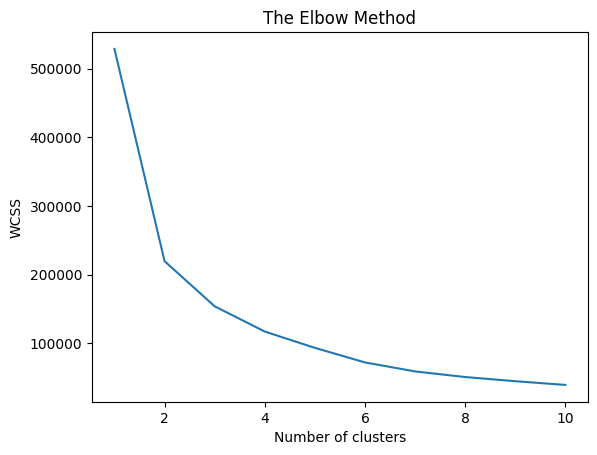

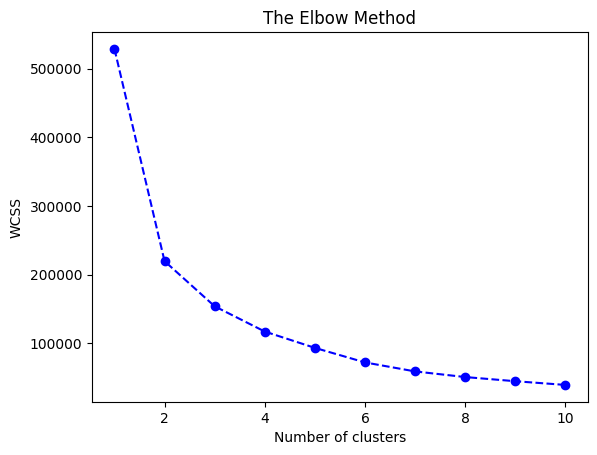

In [121]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
 # Load your data
df = pd.read_csv('/content/preprocessed_data.csv')

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)  # Now you are fitting the KMeans model to your data 'x'
    wcss.append(kmeans.inertia_)


# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#plot with color
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

